C:\Users\Luna Tsai\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.8940891472868217


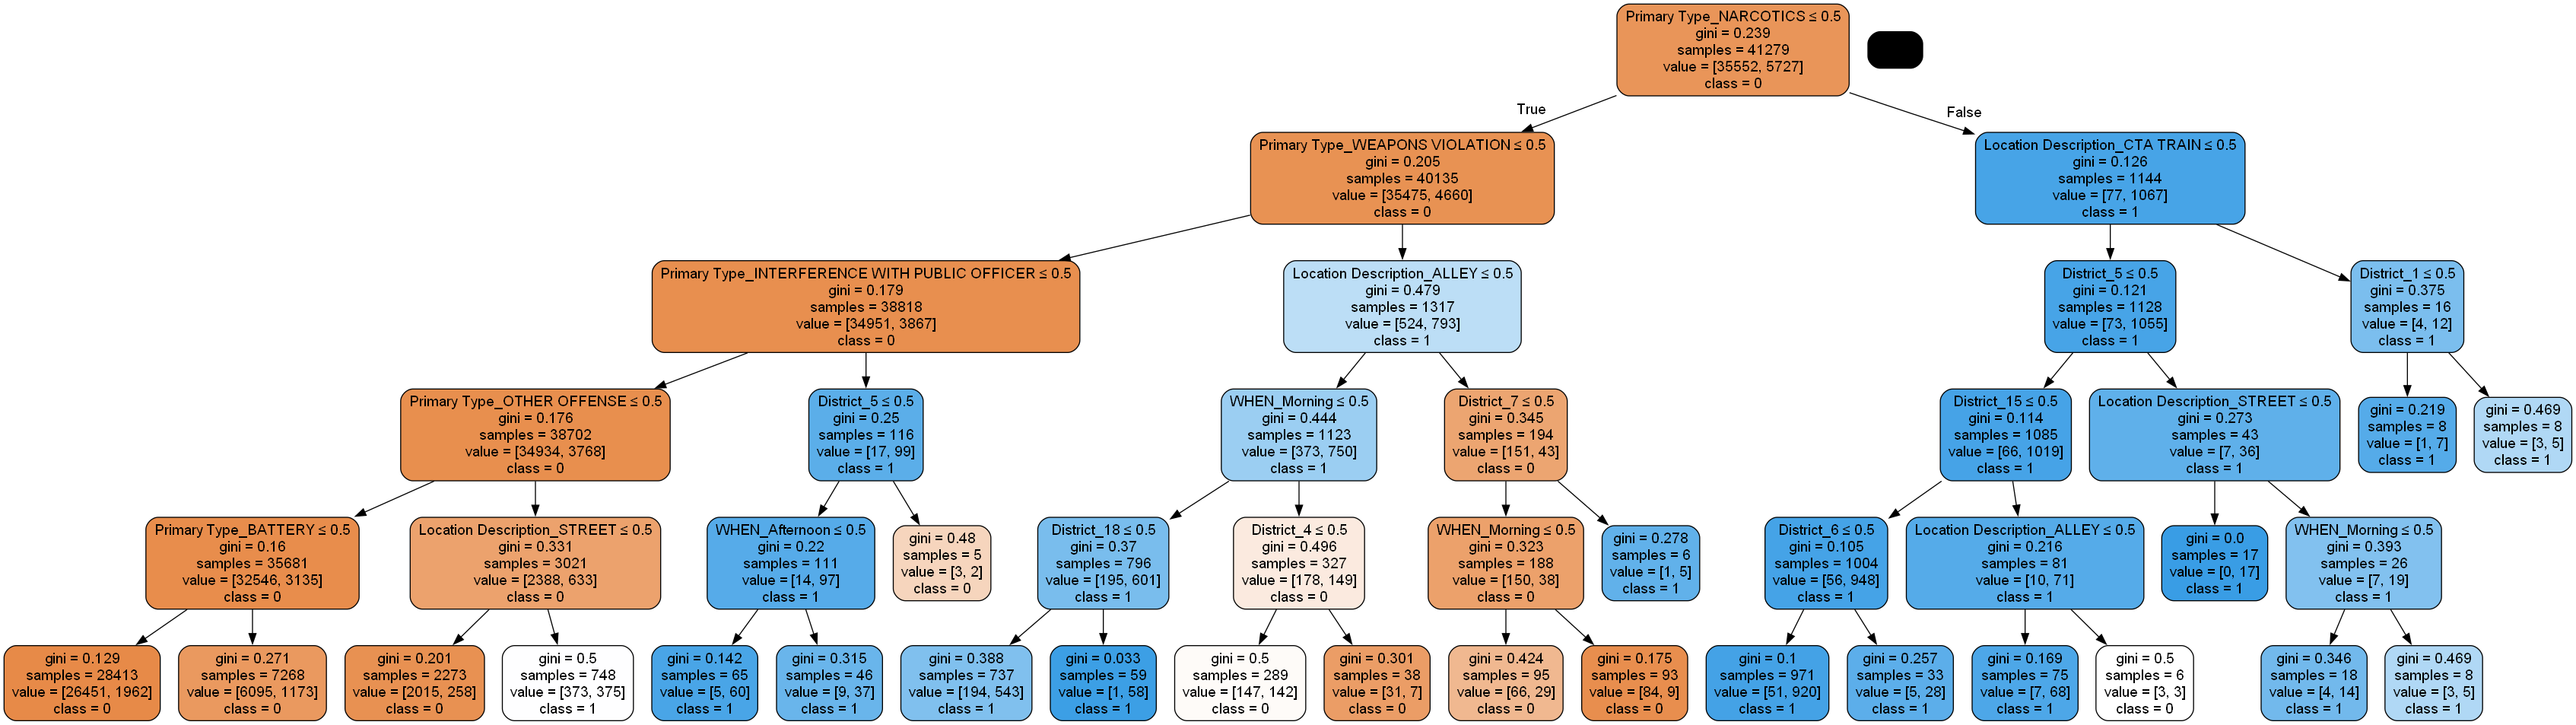

In [11]:
import pandas as pd  #for data manipulation
from sklearn.tree import DecisionTreeClassifier, export_graphviz  #for building the model and export_graphviz for tree visualization
from sklearn.model_selection import train_test_split  #for splitting the dataset
from sklearn.preprocessing import OneHotEncoder  #encoding categorical variables
from sklearn.metrics import accuracy_score  #for evaluating model performance
from IPython.display import Image  #for displaying the decision tree graph
import io  #for displaying the decision tree graph
import pydotplus  #for displaying the decision tree graph

# Define column names
col_names = ['WHEN', 'Primary Type', 'Location Description', 'Arrest', 'Domestic', 'District']

# Load dataset
data = pd.read_csv("C:\\Users\\Luna Tsai\\Desktop\\INFS630\\Crime_Data_Set_Cleaned_for_classification.csv", header=0, names=col_names)

# Convert the numerical values in the 'District' column into string type
data['District'] = data['District'].astype(str)

# Extract categorical columns
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

# One-hot encode categorical variables
one_hot_encoder = OneHotEncoder(sparse=False)
data_encoded = one_hot_encoder.fit_transform(data[cat_cols])
encoded_feature_names = one_hot_encoder.get_feature_names_out(cat_cols)
data_encoded = pd.DataFrame(data_encoded, columns=encoded_feature_names)

# Replace categorical columns with one-hot encoded columns
data.drop(columns=cat_cols, inplace=True)
data = pd.concat([data, data_encoded], axis=1)

# Split dataset into features and target variable
X = data.drop('Arrest', axis=1)  # Features (remove the target variable)
y = data['Arrest']  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object

clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=5, max_leaf_nodes=None)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))  # Use accuracy_score directly


# Visualize the decision tree
feature_cols = list(X.columns)  # Update feature_cols to contain the correct feature names
# Visualize the decision tree with limited depth
dot_data = io.StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
